In [54]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## shp 파일 시각화

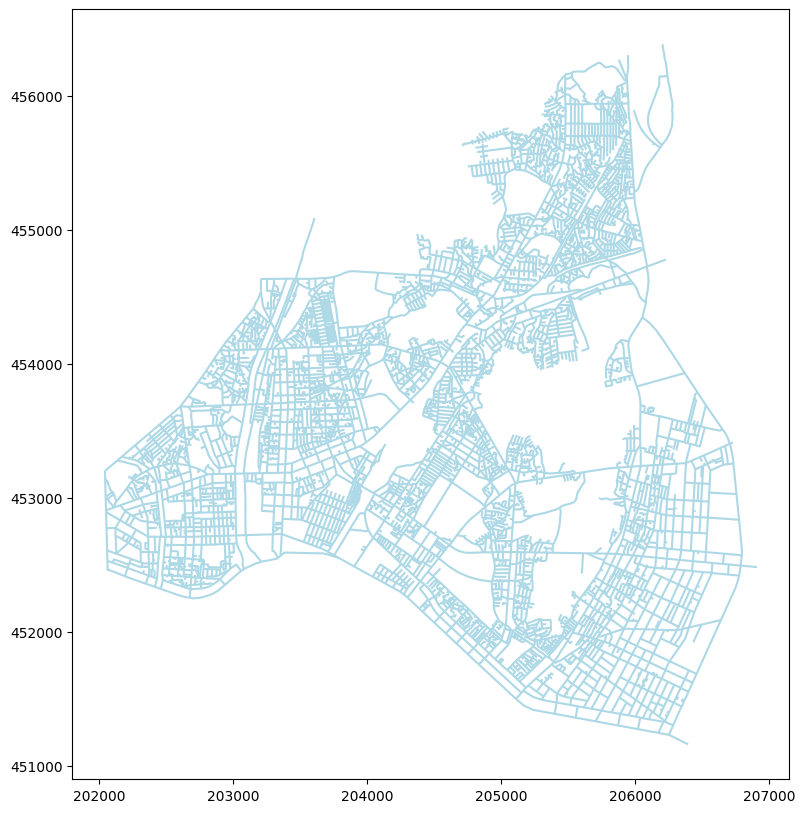

In [55]:
# Shapefile 읽기
dir_path ="/content/drive/MyDrive/2024-02-machine-learning/data/geolocation_data"
file_name = "TL_SPRD_MANAGE.shp"
dongdaemun_map = gpd.read_file(f"{dir_path}/{file_name}")

# Shapefile에서 동대문구 필터링
filtered_map = dongdaemun_map[dongdaemun_map['SIG_CD'] == '11230']

# 데이터 시각화
fig, ax = plt.subplots(figsize=(10, 10))
filtered_map.plot(ax=ax, edgecolor='black', color='lightblue')
plt.show()

## 유동인구

In [56]:
# basepath
dir_path = "/content/drive/MyDrive/2024-02-machine-learning/data"

In [57]:
# 유동인구 데이터
df_seoul_foot_traffic = pd.read_csv(f'{dir_path}/foot_traffic_data/foot_traffic_dongdaemun.csv')
df_seoul_foot_traffic

# 유동인구 데이터에서 2016년 5월 데이터만 필터링
df_seoul_foot_traffic_201605 = df_seoul_foot_traffic[df_seoul_foot_traffic['STDR_YM_CD'] == 201605]
df_seoul_foot_traffic_201605

,STDR_YM_CD,RD_LINK_ID,SIGNGU_CD,ADSTRD_CD,DAYWEEK_CD,AGRDE_CD,TMZON_CD,FLPOP_CO
1110552,201605,57583,11230,11230536,1,0,0,257.3732
1110553,201605,57583,11230,11230536,1,0,1,0.5476
1110554,201605,57583,11230,11230536,1,0,2,40.6968
1110555,201605,57583,11230,11230536,1,0,3,64.5174
1110556,201605,57583,11230,11230536,1,0,4,65.7552
...,...,...,...,...,...,...,...,...
21712973,201605,37598,11230,11230750,2,10,1,0.0000
21712974,201605,37598,11230,11230750,2,10,2,0.1035
21712975,201605,37598,11230,11230750,2,10,3,0.9030
21712976,201605,37598,11230,11230750,2,10,4,0.8090


In [69]:
df_seoul_foot_traffic_201605.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1795164 entries, 1110552 to 21712977
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   STDR_YM_CD  int64  
 1   RD_LINK_ID  int64  
 2   SIGNGU_CD   int64  
 3   ADSTRD_CD   int64  
 4   DAYWEEK_CD  int64  
 5   AGRDE_CD    int64  
 6   TMZON_CD    int64  
 7   FLPOP_CO    float64
dtypes: float64(1), int64(7)
memory usage: 123.3 MB


In [58]:
# 공간 정보 데이터
df_road_link = gpd.read_file(f'{dir_path}/geolocation_data/TBGIS_ROAD_LINK_FRM (1).shp', encoding='cp949').to_crs(epsg=5181)
df_road_link

,ROAD_LID,ROAD_CD,STDR_YM_CD,geometry
0,1,411503000001,201605,"LINESTRING (205227.085 467813.314, 205242.614 ..."
1,2,411503181063,201605,"LINESTRING (203970.9 466152.07, 203971.511 466..."
2,3,113203109009,201605,"LINESTRING (203958.211 466031.99, 203958.227 4..."
3,4,113204127309,201605,"LINESTRING (203895.135 465994.69, 203878.256 4..."
4,5,411503181063,201605,"LINESTRING (203971.257 465878.119, 203968.937 ..."
...,...,...,...,...
180455,180456,412902000004,201605,"LINESTRING (197998.245 433759.047, 198001.447 ..."
180456,180457,411311000027,201605,"LINESTRING (206758.288 432949.045, 206760.899 ..."
180457,180458,411353180005,201605,"LINESTRING (209037.477 427147.068, 209032.841 ..."
180458,180459,411352000005,201605,"LINESTRING (209658.753 426294.512, 209657.489 ..."


In [66]:
df_road_link_to_wsg = df_road_link.to_crs(epsg=4326)
df_road_link['centroid'] = df_road_link['geometry'].centroid

df_road_link_centroid_to_wsg = gpd.GeoDataFrame(df_road_link, geometry='centroid').to_crs(epsg=4326)
df_road_link_centroid_to_wsg

,ROAD_LID,ROAD_CD,STDR_YM_CD,geometry,centroid
0,1,411503000001,201605,"LINESTRING (205227.085 467813.314, 205242.614 ...",POINT (127.05529 37.73738)
1,2,411503181063,201605,"LINESTRING (203970.9 466152.07, 203971.511 466...",POINT (127.04643 37.72985)
2,3,113203109009,201605,"LINESTRING (203958.211 466031.99, 203958.227 4...",POINT (127.04495 37.6945)
3,4,113204127309,201605,"LINESTRING (203895.135 465994.69, 203878.256 4...",POINT (127.04345 37.69368)
4,5,411503181063,201605,"LINESTRING (203971.257 465878.119, 203968.937 ...",POINT (127.04495 37.69326)
...,...,...,...,...,...
180455,180456,412902000004,201605,"LINESTRING (197998.245 433759.047, 198001.447 ...",POINT (126.9926 37.42406)
180456,180457,411311000027,201605,"LINESTRING (206758.288 432949.045, 206760.899 ...",POINT (127.08778 37.40243)
180457,180458,411353180005,201605,"LINESTRING (209037.477 427147.068, 209032.841 ...",POINT (127.10265 37.37666)
180458,180459,411352000005,201605,"LINESTRING (209658.753 426294.512, 209657.489 ...",POINT (127.12127 37.40045)


In [67]:
df_road_link_centroid_to_wsg['x'] = df_road_link_centroid_to_wsg['centroid'].x.astype(float)
df_road_link_centroid_to_wsg['y'] = df_road_link_centroid_to_wsg['centroid'].y.astype(float)
df_road_link_centroid_to_wsg

,ROAD_LID,ROAD_CD,STDR_YM_CD,geometry,centroid,x,y
0,1,411503000001,201605,"LINESTRING (205227.085 467813.314, 205242.614 ...",POINT (127.05529 37.73738),127.055291,37.737382
1,2,411503181063,201605,"LINESTRING (203970.9 466152.07, 203971.511 466...",POINT (127.04643 37.72985),127.046432,37.729847
2,3,113203109009,201605,"LINESTRING (203958.211 466031.99, 203958.227 4...",POINT (127.04495 37.6945),127.044947,37.694497
3,4,113204127309,201605,"LINESTRING (203895.135 465994.69, 203878.256 4...",POINT (127.04345 37.69368),127.043455,37.693683
4,5,411503181063,201605,"LINESTRING (203971.257 465878.119, 203968.937 ...",POINT (127.04495 37.69326),127.044954,37.693262
...,...,...,...,...,...,...,...
180455,180456,412902000004,201605,"LINESTRING (197998.245 433759.047, 198001.447 ...",POINT (126.9926 37.42406),126.992603,37.424057
180456,180457,411311000027,201605,"LINESTRING (206758.288 432949.045, 206760.899 ...",POINT (127.08778 37.40243),127.087783,37.402430
180457,180458,411353180005,201605,"LINESTRING (209037.477 427147.068, 209032.841 ...",POINT (127.10265 37.37666),127.102646,37.376657
180458,180459,411352000005,201605,"LINESTRING (209658.753 426294.512, 209657.489 ...",POINT (127.12127 37.40045),127.121271,37.400446


In [70]:
df_road_link_centroid_to_wsg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 180460 entries, 0 to 180459
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   ROAD_LID    180460 non-null  object  
 1   ROAD_CD     180460 non-null  object  
 2   STDR_YM_CD  180460 non-null  object  
 3   geometry    180460 non-null  geometry
 4   centroid    180460 non-null  geometry
 5   x           180460 non-null  float64 
 6   y           180460 non-null  float64 
dtypes: float64(2), geometry(2), object(3)
memory usage: 9.6+ MB


In [71]:
df_seoul_foot_traffic_201605['RD_LINK_ID'] = df_seoul_foot_traffic_201605['RD_LINK_ID'].astype(int)
df_road_link_centroid_to_wsg['ROAD_LID'] = df_road_link_centroid_to_wsg['ROAD_LID'].astype(int)

<ipython-input-71-cf386559af2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul_foot_traffic_201605['RD_LINK_ID'] = df_seoul_foot_traffic_201605['RD_LINK_ID'].astype(int)


In [77]:
# 두 데이터프레임 조인
df_combined_foot_traffic = pd.merge(
    df_seoul_foot_traffic_201605,               # 첫 번째 데이터프레임
    df_road_link_centroid_to_wsg,          # 두 번째 데이터프레임
    left_on='RD_LINK_ID',                      # 첫 번째 데이터프레임의 기준 열
    right_on='ROAD_LID',                       # 두 번째 데이터프레임의 기준 열
    how='left'                                # 조인의 종류: inner, left, right, outer 중 선택
)

# 결과 확인
print(df_combined_foot_traffic)


         STDR_YM_CD_x  RD_LINK_ID  SIGNGU_CD  ADSTRD_CD  DAYWEEK_CD  AGRDE_CD  \
0              201605       57583      11230   11230536           1         0   
1              201605       57583      11230   11230536           1         0   
2              201605       57583      11230   11230536           1         0   
3              201605       57583      11230   11230536           1         0   
4              201605       57583      11230   11230536           1         0   
...               ...         ...        ...        ...         ...       ...   
1795159        201605       37598      11230   11230750           2        10   
1795160        201605       37598      11230   11230750           2        10   
1795161        201605       37598      11230   11230750           2        10   
1795162        201605       37598      11230   11230750           2        10   
1795163        201605       37598      11230   11230750           2        10   

         TMZON_CD  FLPOP_CO

In [78]:
columns_to_keep = ['STDR_YM_CD_x', 'RD_LINK_ID', 'AGRDE_CD', 'TMZON_CD', 'FLPOP_CO', 'x', 'y']
df_combined_foot_traffic = df_combined_foot_traffic[columns_to_keep]
df_combined_foot_traffic

,STDR_YM_CD_x,RD_LINK_ID,AGRDE_CD,TMZON_CD,FLPOP_CO,x,y
0,201605,57583,0,0,257.3732,127.029251,37.582033
1,201605,57583,0,1,0.5476,127.029251,37.582033
2,201605,57583,0,2,40.6968,127.029251,37.582033
3,201605,57583,0,3,64.5174,127.029251,37.582033
4,201605,57583,0,4,65.7552,127.029251,37.582033
...,...,...,...,...,...,...,...
1795159,201605,37598,10,1,0.0000,127.067410,37.599356
1795160,201605,37598,10,2,0.1035,127.067410,37.599356
1795161,201605,37598,10,3,0.9030,127.067410,37.599356
1795162,201605,37598,10,4,0.8090,127.067410,37.599356


시간대(TMZON_CD)
- 0: 총 유동인구수
- 1: 00:00 ~ 06:00
- 2: 06:01 ~ 11:00
- 3: 11:01 ~ 14:00
- 4: 14:01 ~ 17:00
- 5: 17:01 ~ 21:00
- 6: 21:01 ~ 24:00
야간의 유동인구수가 적은 도로를 찾는 것이 목표이므로, 1, 6의 데이터만 필터링한다.

In [80]:
# AGRDE_CD가 0이 아닌 값 필터링
df_combined_foot_traffic = df_combined_foot_traffic[df_combined_foot_traffic['AGRDE_CD'] != 0]

# 야간 필터링
df_combined_foot_traffic = df_combined_foot_traffic[df_combined_foot_traffic['TMZON_CD'].isin([1, 6])]

df_combined_foot_traffic.head()


,STDR_YM_CD_x,RD_LINK_ID,AGRDE_CD,TMZON_CD,FLPOP_CO,x,y
8,201605,57583,10,1,0.0000,127.029251,37.582033
13,201605,57583,10,6,0.0668,127.029251,37.582033
15,201605,57583,20,1,0.5476,127.029251,37.582033
20,201605,57583,20,6,8.2260,127.029251,37.582033
22,201605,57583,30,1,0.0000,127.029251,37.582033


In [82]:
# RD_LINK_ID 기준으로 그룹화하여 FLPOP_CO 합계 및 x, y 유지
df_grouped = df_combined_foot_traffic.groupby('RD_LINK_ID', as_index=False).agg({
    'FLPOP_CO': 'sum',  # FLPOP_CO 합산
    'x': 'first',       # x의 첫 번째 값 유지
    'y': 'first'        # y의 첫 번째 값 유지
})

# 결과 확인
print(df_grouped)


      RD_LINK_ID  FLPOP_CO           x          y
0          32063   20.2540  127.064872  37.605760
1          32149   57.6400  127.064643  37.605684
2          32230   57.6400  127.064421  37.605583
3          32246   26.7892  127.065165  37.605649
4          32318   62.0100  127.064199  37.605483
...          ...       ...         ...        ...
7080       84994    0.7768  127.070092  37.561103
7081       84995   46.9335  127.069041  37.560848
7082       85213    0.0000  127.070944  37.560919
7083       85214    0.1850  127.070316  37.560661
7084       86219    0.0000  127.071624  37.560256

[7085 rows x 4 columns]


In [83]:
# Q1 계산 (1분위수)
Q1 = df_grouped['FLPOP_CO'].quantile(0.25)

# 1분위수(Q1) 이하의 데이터 필터링
Q1_foot_traffic = df_grouped[df_grouped['FLPOP_CO'] <= Q1]


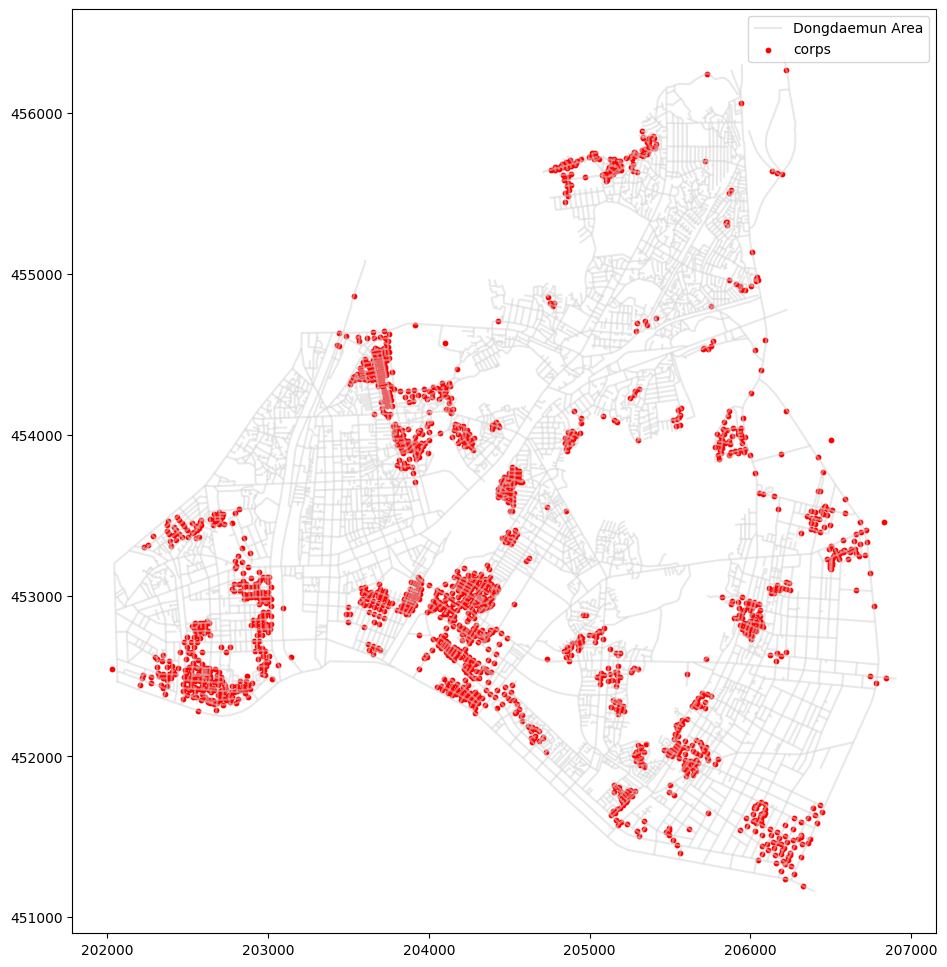

In [84]:
# 보안등 데이터를 GeoDataFrame으로 변환 (EPSG:4326)
geometry = [Point(xy) for xy in zip(Q1_foot_traffic['x'], Q1_foot_traffic['y'])]
foot_traffic_geo = gpd.GeoDataFrame(Q1_foot_traffic, geometry=geometry, crs='EPSG:4326')

foot_traffic_geo = foot_traffic_geo.to_crs(filtered_map.crs)

# 동대문구 지도와 법인 데이터를 함께 시각화
fig, ax = plt.subplots(figsize=(12, 12))
filtered_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Dongdaemun Area')
foot_traffic_geo.plot(ax=ax, color='red', markersize=10, label='corps')
plt.legend()
plt.show()

In [85]:
output_path = "/content/drive/MyDrive/bigdata/dataset/전처리 완료/유동인구.csv"
Q1_foot_traffic.to_csv(output_path, index=False, encoding='utf-8-sig')